# Telecom Churn EDA Project

In [333]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio ## graph ke templates ke liye
import plotly.colors as colors
pio.templates.default= 'plotly_white'
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [39]:
df= pd.read_csv(r'C:\Users\UsEr\Downloads\Customer Churn - Databel - Customer.csv')
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason,Churned
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,6,No,Month-to-Month,Direct Debit,10,10,NaN,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,6,Yes,One Year,Paper Check,21,703,NaN,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,6,Yes,One Year,Direct Debit,23,1014,NaN,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,6,No,Month-to-Month,Paper Check,17,177,NaN,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,6,No,One Year,Direct Debit,28,1720,NaN,NaN,NaN


# Appy EDA

In [5]:
df.shape

(6687, 30)

In [6]:
df.columns

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason', 'Churned'],
      dtype='object')

### drop Unnecessary Colums

In [40]:
df.drop(['Local Calls','Local Mins','Customer Service Calls','Phone Number','Number of Customers in Group','Extra International Charges',
         'Device Protection & Online Backup','Avg Monthly GB Download','Under 30','Senior','Group','Intl Calls','Intl Mins','Churned'],
        inplace=True,axis=1)

In [41]:
df.shape

(6687, 16)

In [42]:
df.head()

,Customer ID,Churn Label,Account Length (in months),Intl Active,Intl Plan,Unlimited Data Plan,Extra Data Charges,State,Gender,Age,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,No,no,Yes,0,KS,Female,35,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,No,no,Yes,0,OH,Male,49,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,No,yes,Yes,0,OH,Male,51,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,Yes,yes,Yes,0,MO,Female,41,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,Yes,yes,Yes,0,WV,Male,51,One Year,Direct Debit,28,1720,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 6687 non-null   object
 1   Churn Label                 6687 non-null   object
 2   Account Length (in months)  6687 non-null   int64 
 3   Intl Active                 6687 non-null   object
 4   Intl Plan                   6687 non-null   object
 5   Unlimited Data Plan         6687 non-null   object
 6   Extra Data Charges          6687 non-null   int64 
 7   State                       6687 non-null   object
 8   Gender                      6687 non-null   object
 9   Age                         6687 non-null   int64 
 10  Contract Type               6687 non-null   object
 11  Payment Method              6687 non-null   object
 12  Monthly Charge              6687 non-null   int64 
 13  Total Charges               6687 non-null   int6

In [38]:
df.dtypes

Customer ID                    object
Churn Label                    object
Account Length (in months)      int64
Intl Active                    object
Intl Plan                      object
Unlimited Data Plan            object
Extra Data Charges              int64
State                          object
Gender                         object
Age                             int64
Contract Type                  object
Payment Method                 object
Monthly Charge                  int64
Total Charges                   int64
Churn Category                 object
Churn Reason                   object
Churned                       float64
dtype: object

### Find & Remove Null values

In [44]:
df.isna().sum()

Customer ID                      0
Churn Label                      0
Account Length (in months)       0
Intl Active                      0
Intl Plan                        0
Unlimited Data Plan              0
Extra Data Charges               0
State                            0
Gender                           0
Age                              0
Contract Type                    0
Payment Method                   0
Monthly Charge                   0
Total Charges                    0
Churn Category                4918
Churn Reason                  4918
dtype: int64

In [47]:
(df.isna().sum()/df.shape[0]*100)

Customer ID                    0.000000
Churn Label                    0.000000
Account Length (in months)     0.000000
Intl Active                    0.000000
Intl Plan                      0.000000
Unlimited Data Plan            0.000000
Extra Data Charges             0.000000
State                          0.000000
Gender                         0.000000
Age                            0.000000
Contract Type                  0.000000
Payment Method                 0.000000
Monthly Charge                 0.000000
Total Charges                  0.000000
Churn Category                73.545686
Churn Reason                  73.545686
dtype: float64

### Find & remove Duplicate Values

In [48]:
df.duplicated().sum() ## There are no dulpicates values present

0

###  Check all dataypes Columns exists same datatype nature

In [49]:
df.dtypes

Customer ID                   object
Churn Label                   object
Account Length (in months)     int64
Intl Active                   object
Intl Plan                     object
Unlimited Data Plan           object
Extra Data Charges             int64
State                         object
Gender                        object
Age                            int64
Contract Type                 object
Payment Method                object
Monthly Charge                 int64
Total Charges                  int64
Churn Category                object
Churn Reason                  object
dtype: object

##  Summurization & Visulization Data

### 1.)  Churn Label Vs Gender

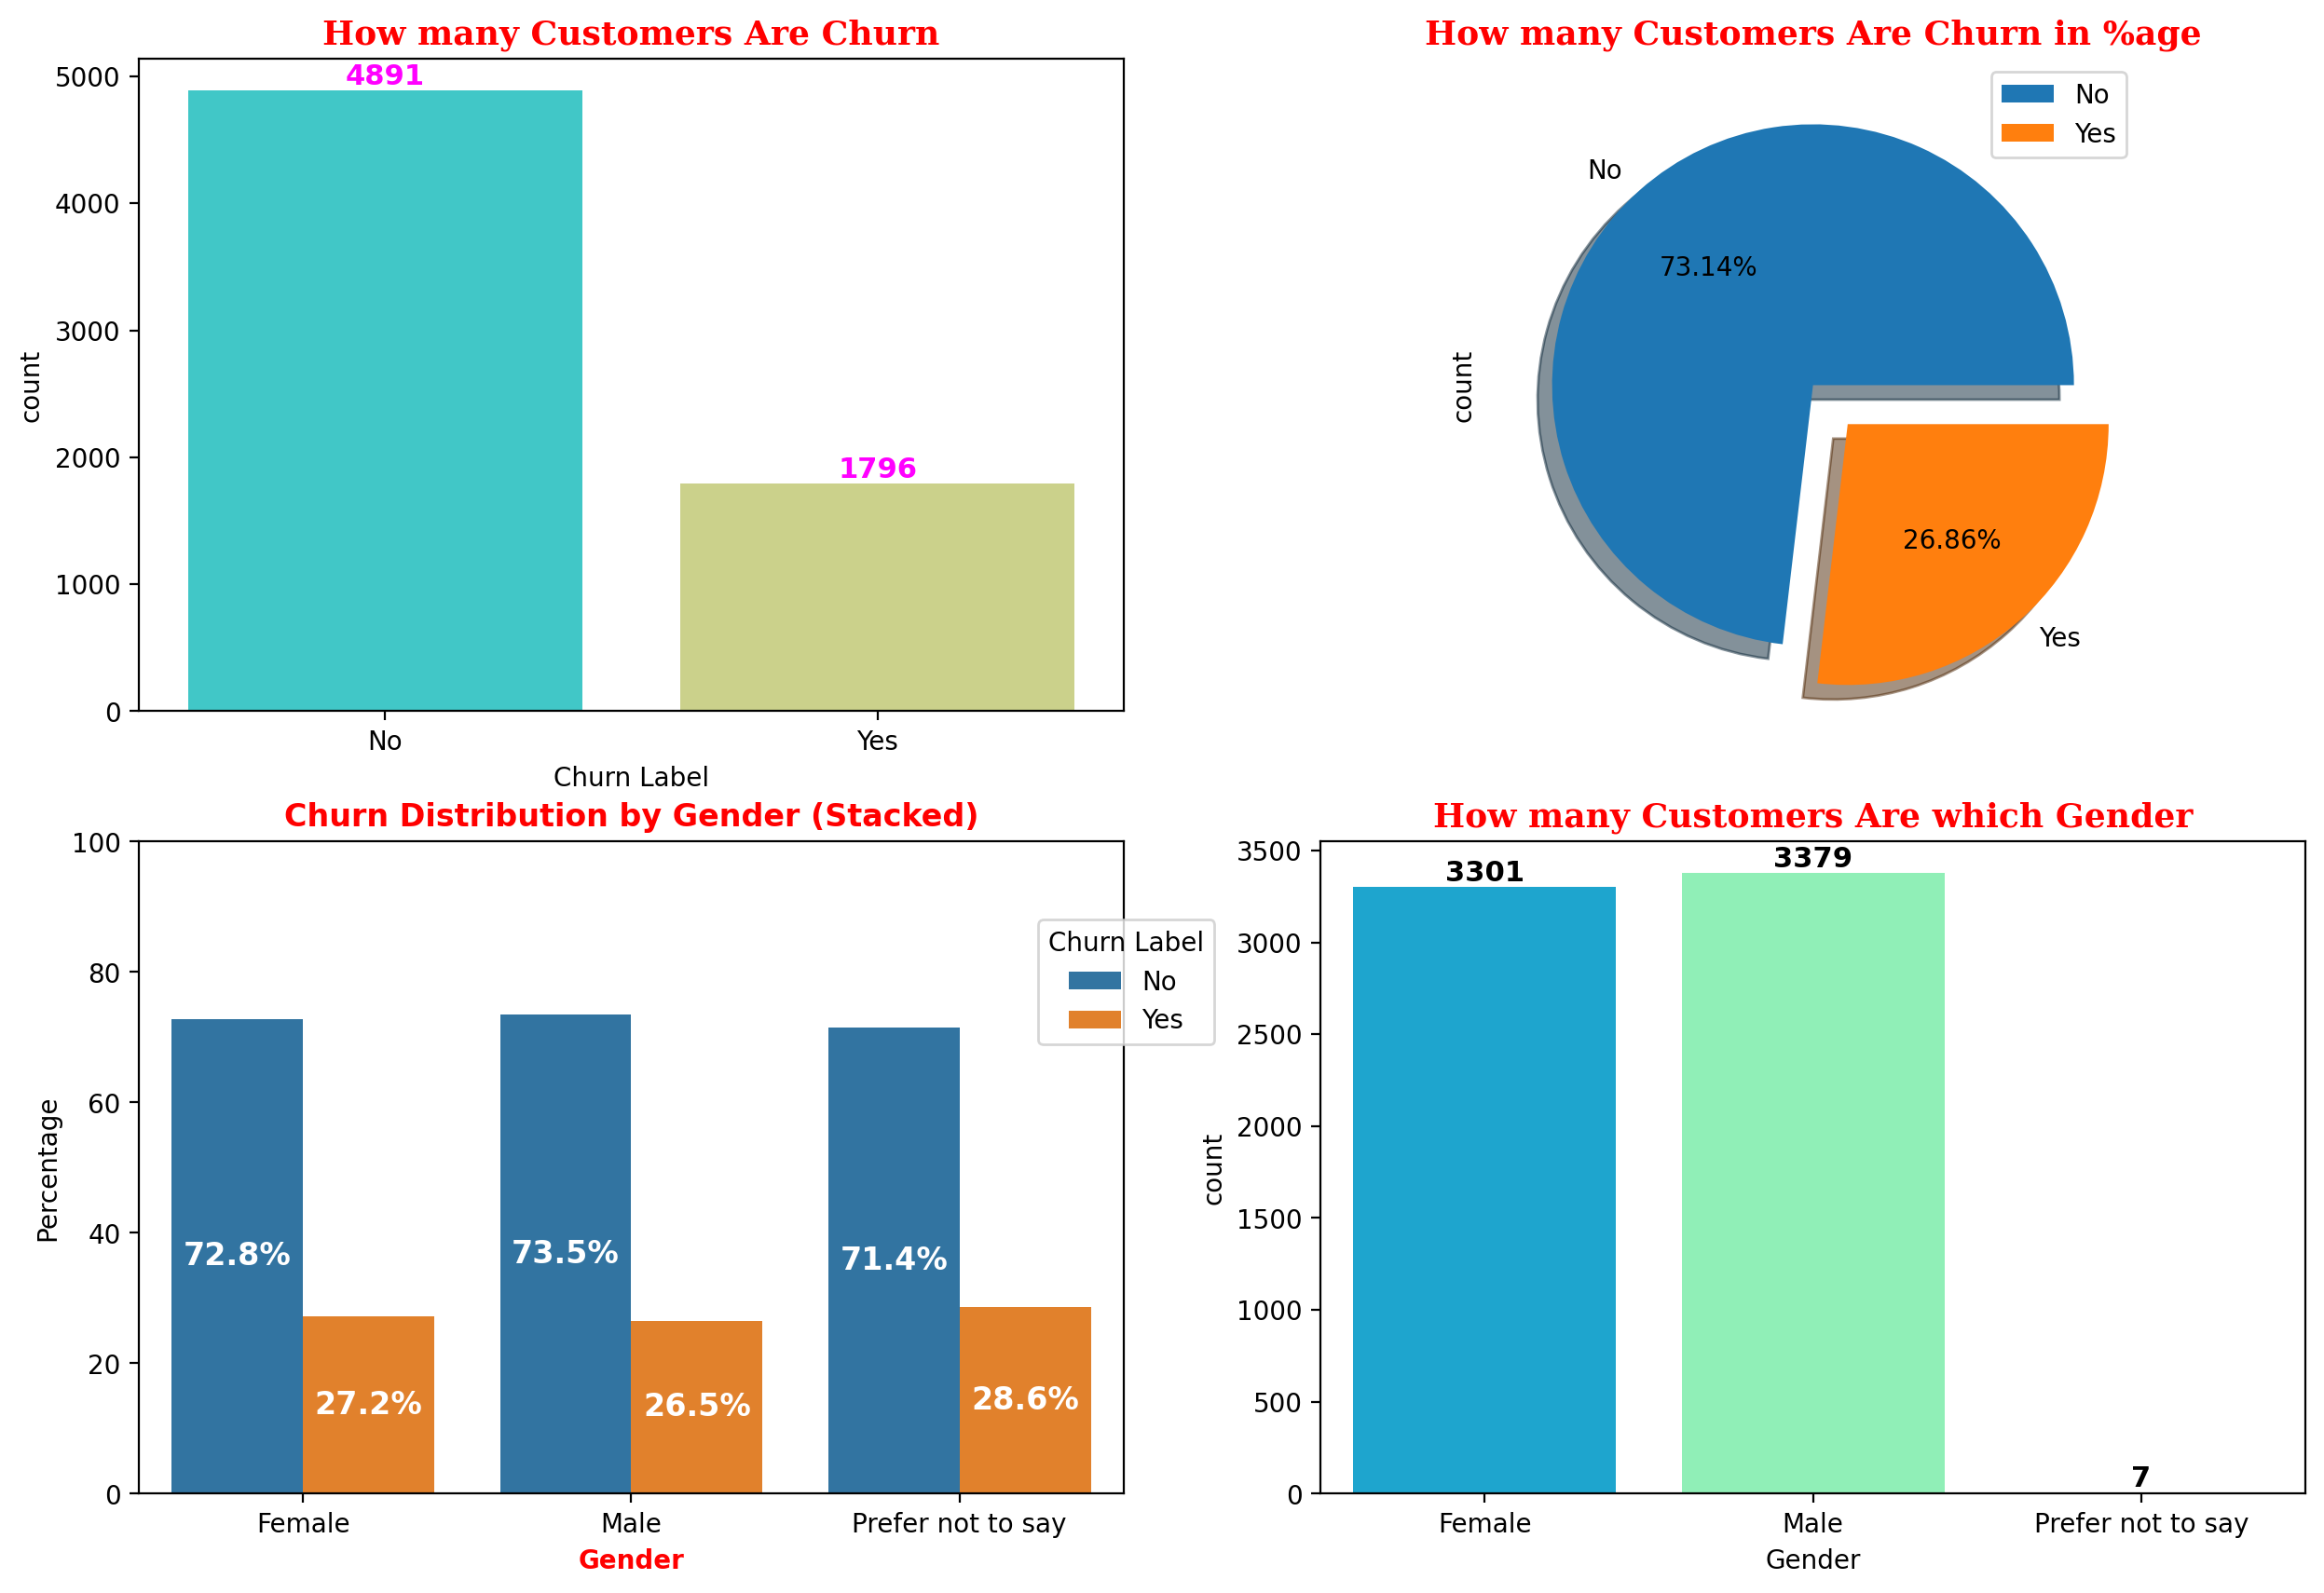

In [279]:
plt.figure(figsize=(15,10),dpi=200)
plt.subplot(2,2,1)
ax=sns.countplot(x='Churn Label',data=df,palette='rainbow')
ax.bar_label(ax.containers[0],fontsize=11,color='magenta',weight='bold')
ax.bar_label(ax.containers[1],fontsize=11,color='magenta',weight='bold')
plt.title('How many Customers Are Churn',fontsize=13,color='red',weight='bold',family='serif')

plt.subplot(2,2,2)
df['Churn Label'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0.2])
plt.legend(loc='upper right')
plt.title('How many Customers Are Churn in %age',fontsize=13,color='red',weight='bold',family='serif')

plt.subplot(2,2,3)
df_counts = df.groupby(['Gender', 'Churn Label']).size().reset_index(name='count')
df_totals = df_counts.groupby('Gender')['count'].transform('sum')
df_counts['percentage'] = df_counts['count'] / df_totals * 100  # Convert to percentage

# Create stacked bar chart
ax = sns.barplot(x='Gender', y='percentage', hue='Churn Label', data=df_counts, estimator=sum)

# Annotate bars with percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height / 2), 
                    ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Labels & title
plt.ylabel("Percentage")
plt.xlabel("Gender",color='red',weight='bold')
plt.title("Churn Distribution by Gender (Stacked)",color='red',weight='bold')
plt.legend(title="Churn Label",bbox_to_anchor=(0.9,0.9))
plt.ylim(0, 100)  # Ensure the y-axis is in percentage terms

plt.subplot(2,2,4)
ax=sns.countplot(x='Gender',data=df,palette='rainbow')
ax.bar_label(ax.containers[0],fontsize=11,color='black',weight='bold')
ax.bar_label(ax.containers[1],fontsize=11,color='black',weight='bold')
ax.bar_label(ax.containers[2],fontsize=11,color='black',weight='bold')
plt.title('How many Customers Are which Gender',fontsize=13,color='red',weight='bold',family='serif')
plt.show()

## 2.) Age Vs Churn Label

## Create Age Group

In [132]:
def age_category(age):
    if age < 30:
        return 'Under 30'
    elif 30 <= age <= 59:
        return 'Mid Age'
    else:
        return 'Senior Citizen'

df['Age Group'] = df['Age'].apply(age_category)


In [137]:
churn_customer=df[(df['Churn Label']=='Yes')]

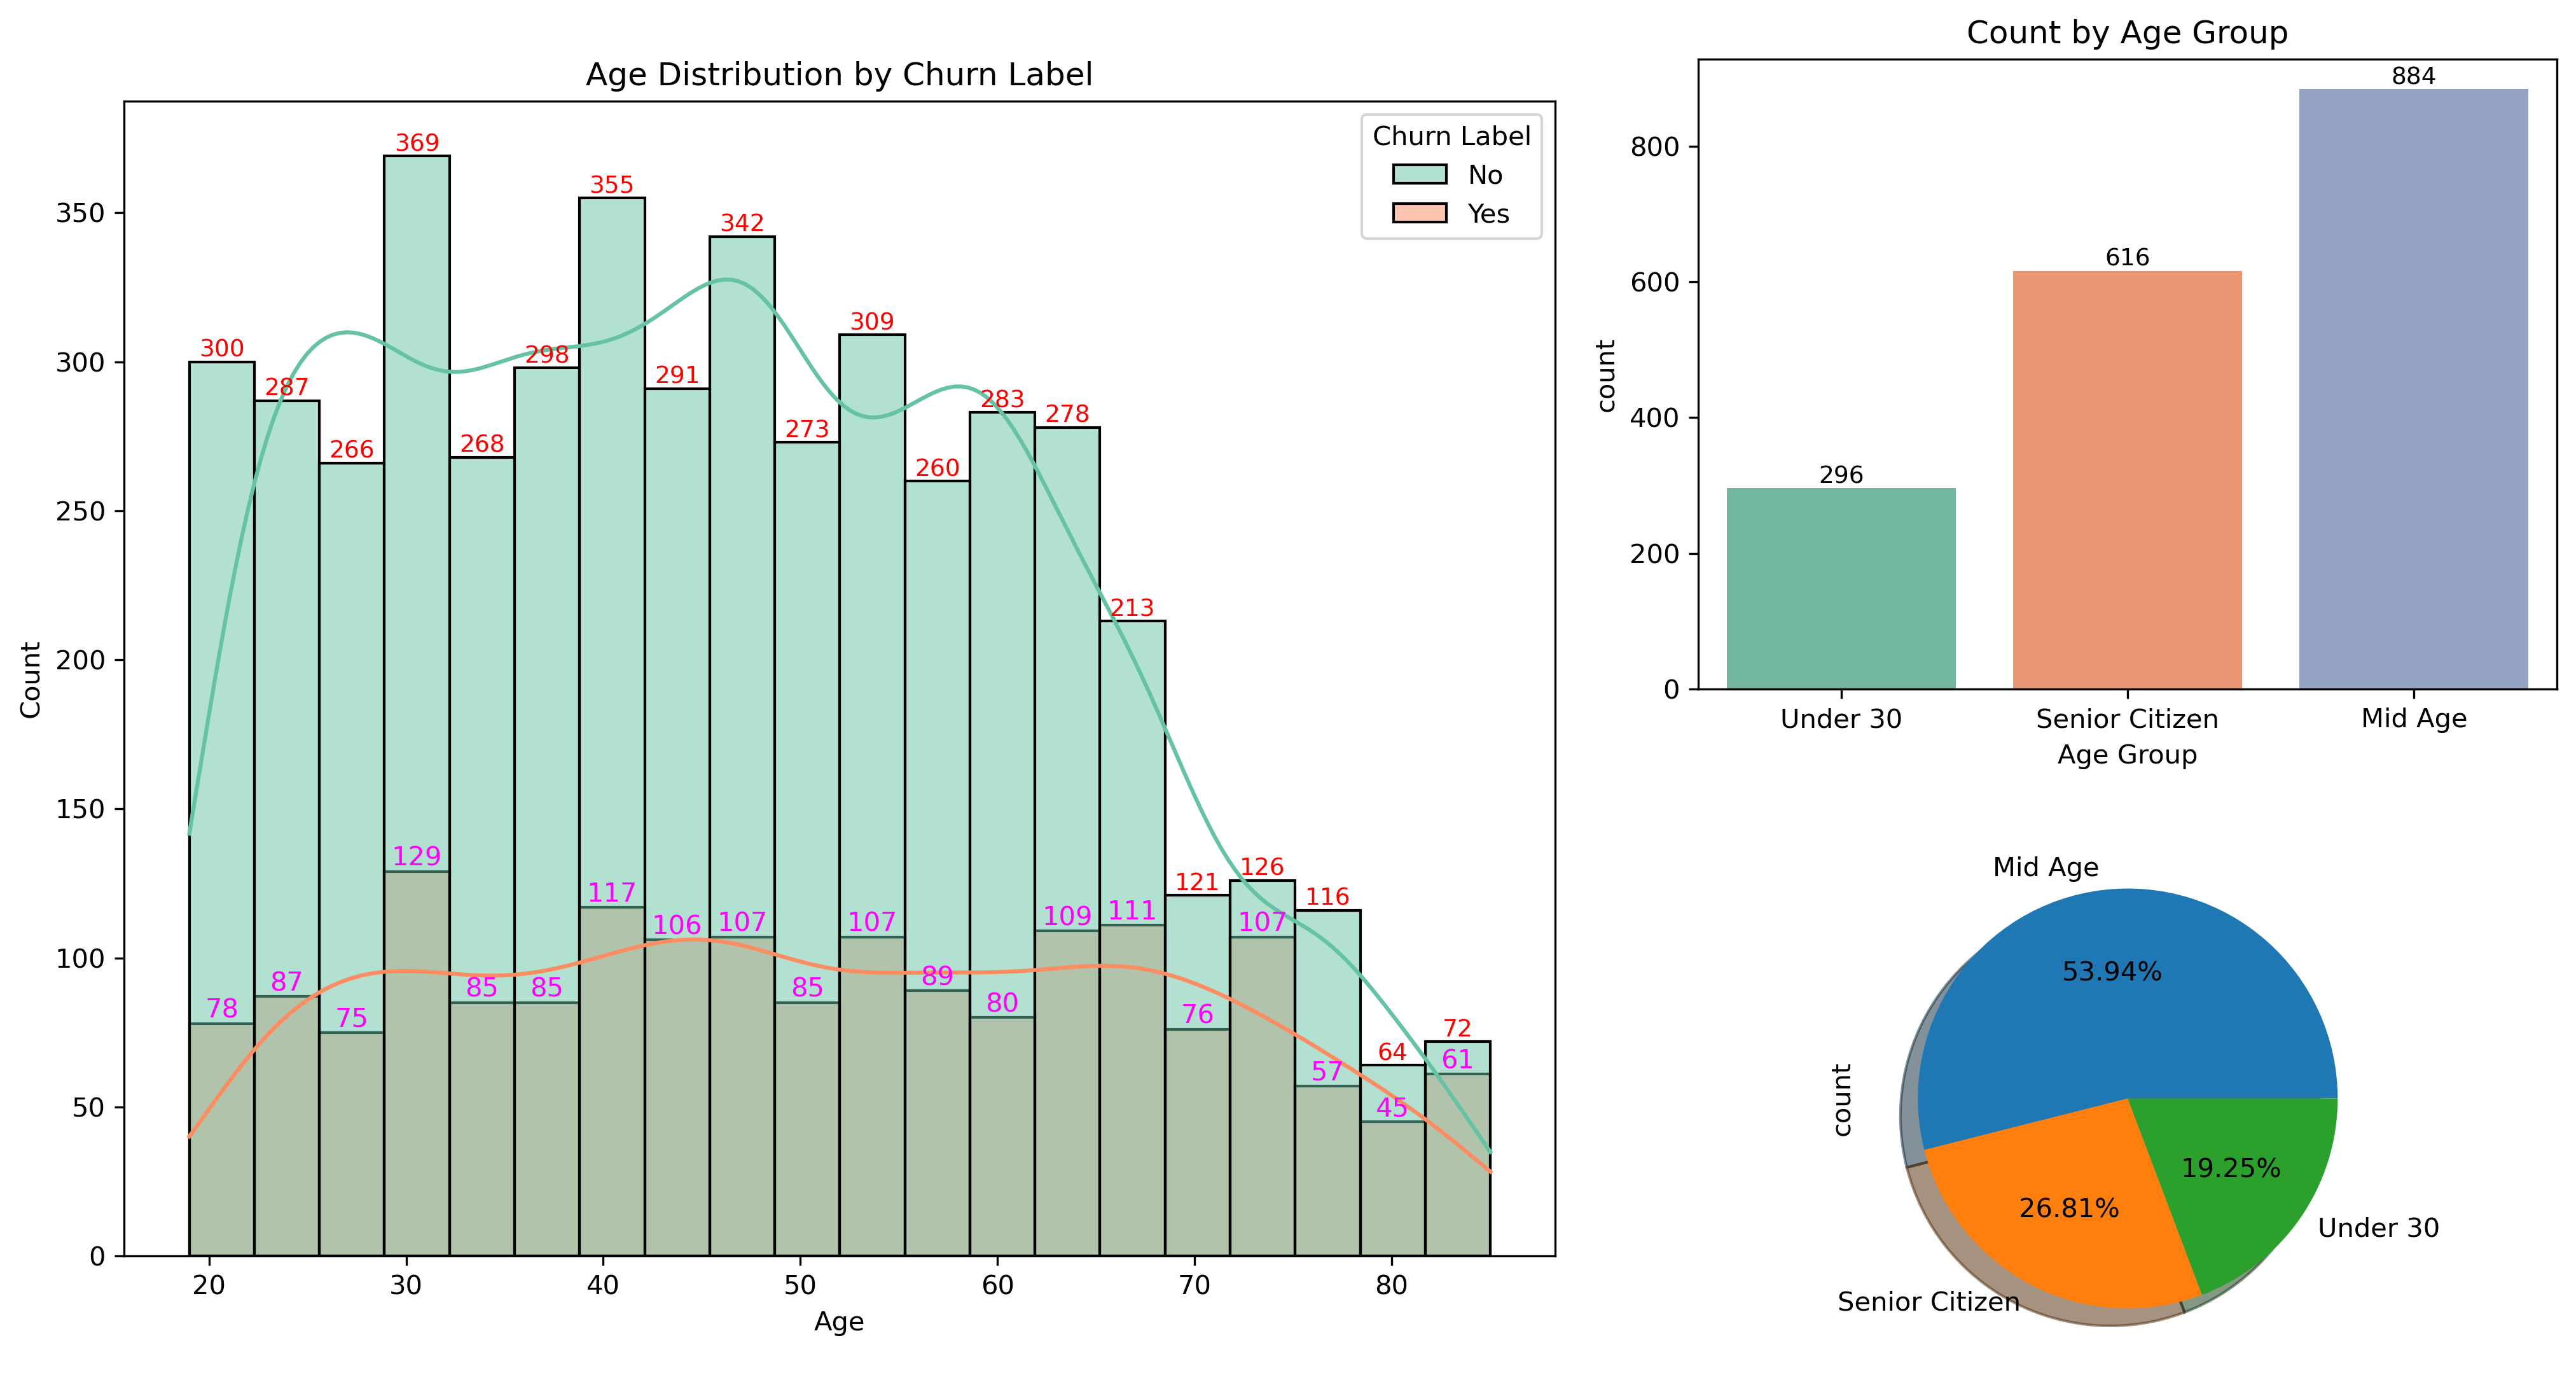

In [357]:
fig = plt.figure(figsize=(15, 5.5),dpi=300)  # Optional: Set figure size

axis1 = fig.add_axes([0.1, 0.11, 0.5, 1.1])
ax=sns.histplot(data=df, x='Age', ax=axis1, bins=20, hue='Churn Label', kde=True,palette="Set2")
axis1.set_title("Age Distribution by Churn Label")
ax.bar_label(ax.containers[0],fontsize=10,color='magenta')
ax.bar_label(ax.containers[1],fontsize=9,color='red')

# Second axis: Countplot (inset)
axis2 = fig.add_axes([0.65, 0.65, 0.3, 0.6])  # Adjust position & size as needed
ax=sns.countplot(x='Age Group', data=churn_customer, ax=axis2,palette='Set2')
axis2.set_title("Count by Age Group")
ax.bar_label(ax.containers[0],fontsize=9,color='black')
ax.bar_label(ax.containers[1],fontsize=9,color='black')
ax.bar_label(ax.containers[2],fontsize=9,color='black')

axis3 = fig.add_axes([0.65, 0.01, 0.3, 0.5])
df['Age Group'].value_counts().plot(kind='pie',ax=axis3,autopct='%0.2f%%',shadow=True)

plt.show()


## 3.) Churn Reason

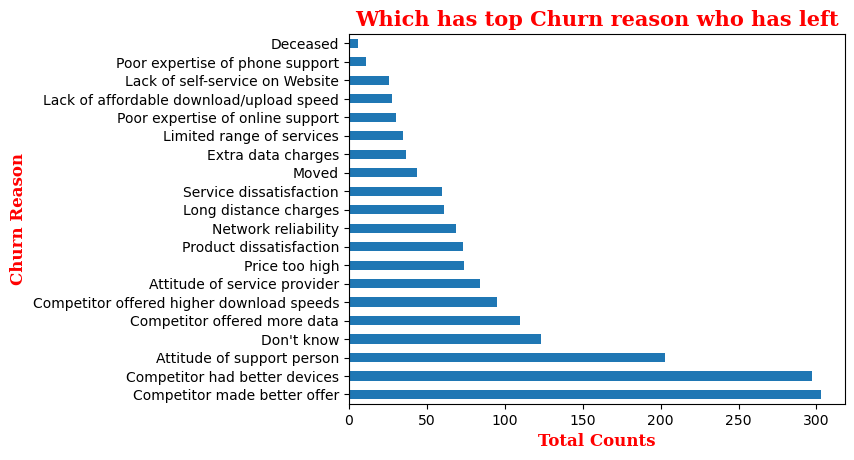

In [294]:
churn_customer['Churn Reason'].value_counts().plot(kind='barh')
plt.xlabel('Total Counts',fontsize=12,color='red',family='serif',weight='bold')
plt.ylabel('Churn Reason',fontsize=12,color='red',family='serif',weight='bold')
plt.title('Which has top Churn reason who has left',fontsize=15,color='red',family='serif',weight='bold')
plt.show()

## 4.) Find Relation ship between Total Charges Vs Churn label

In [368]:
table_revenue= df.pivot_table(values='Total Charges',index='Contract Type',columns='Churn Label')
table_revenue

Churn Label,No,Yes
Contract Type,,
Month-to-Month,659.296397,575.630146
One Year,1329.814787,1973.407186
Two Year,1675.449914,2580.720000


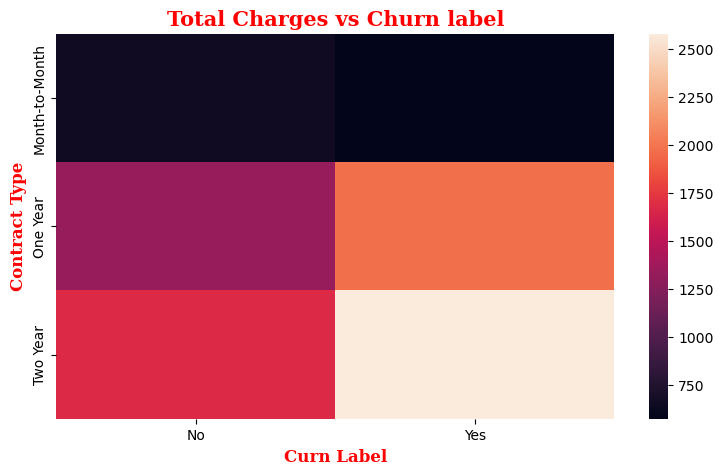

In [337]:
plt.figure(figsize=(9, 5)) 
sns.heatmap(table_revenue)
plt.xlabel('Curn Label',fontsize=12,color='red',family='serif',weight='bold')
plt.ylabel('Contract Type',fontsize=12,color='red',family='serif',weight='bold')
plt.title('Total Charges vs Churn label',fontsize=15,color='red',family='serif',weight='bold')
plt.show()

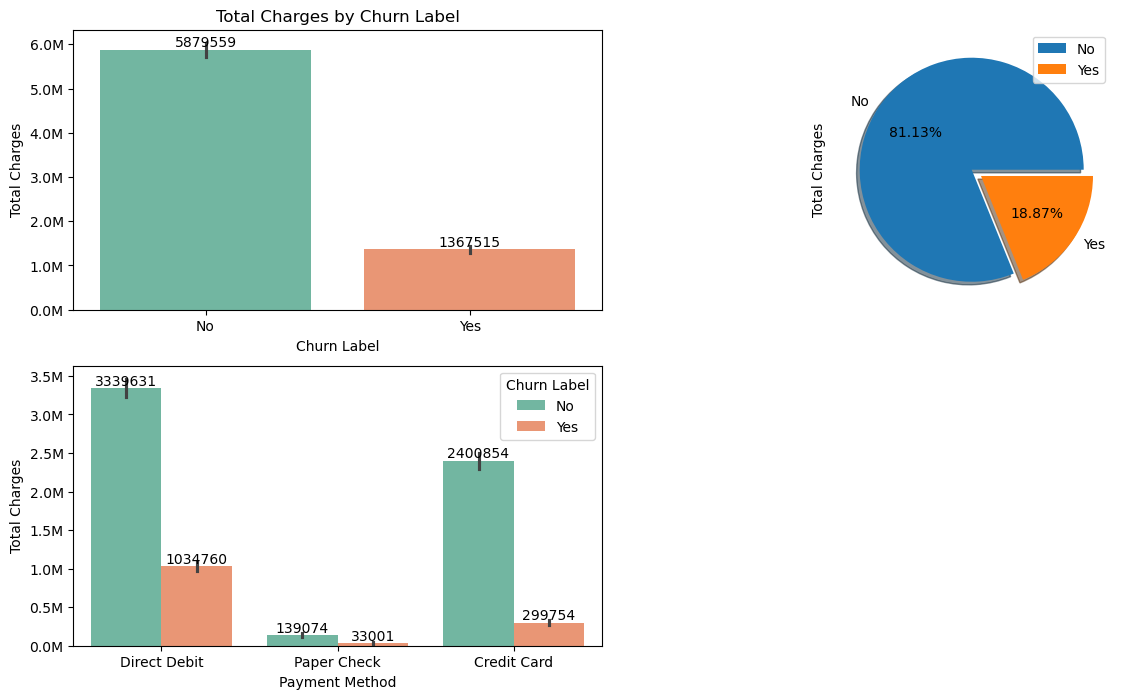

In [366]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
ax = sns.barplot(y='Total Charges',x='Churn Label',data=df,palette='Set2',estimator=np.sum)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')
# Convert y-axis to "Million" format
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.title('Total Charges by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Total Charges')

plt.subplot(2, 2, 2)
df.groupby(['Churn Label'])['Total Charges'].sum().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1],shadow=True)
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
ax=sns.barplot(y='Total Charges',x='Payment Method',data=df,estimator=np.sum,hue='Churn Label',palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))


plt.show()


## Thankyou for seeing my Project